The strategy will use the simple moving average (MA) of 200 days. When the current market price of SPY is above MA we go long (buy and hold SPY), when the current market price of SPY is below MA, we short and buy and hold TLT.

On a high level, we either have all our holding in SPY or in TLT. This means, at all times during the strategy we will either have 100% in SPY or 100% in TLT.

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tickers = ['SPY','TLT']
start = dt.datetime(2007,1,1)
#end = dt.datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start)

In [3]:
data.head()

Attributes   Adj Close                  Close                   High  \
Symbols            SPY        TLT         SPY        TLT         SPY   
Date                                                                   
2007-01-03  104.752144  56.882164  141.369995  89.059998  142.860001   
2007-01-04  104.974457  57.227081  141.669998  89.599998  142.050003   
2007-01-05  104.137146  56.977924  140.539993  89.209999  141.399994   
2007-01-08  104.618744  57.080166  141.190002  89.370003  141.410004   
2007-01-09  104.529877  57.080166  141.070007  89.370003  141.600006   

Attributes                    Low                   Open             \
Symbols           TLT         SPY        TLT         SPY        TLT   
Date                                                                  
2007-01-03  89.459999  140.570007  88.660004  142.250000  89.220001   
2007-01-04  89.650002  140.610001  89.220001  141.229996  89.220001   
2007-01-05  89.400002  140.380005  88.750000  141.330002  88.800003   
2007-01-08  89.370003  140.250000  89.050003  140.820007  89.120003   
2007-01-09  89.480003  140.399994  89.220001  141.309998  89.480003   

Attributes      Volume             
Symbols            SPY        TLT  
Date                               
2007-01-03  94807600.0  1870400.0  
2007-01-04  69620600.0  1697000.0  
2007-01-05  76645300.0  1298400.0  
2007-01-08  71655000.0   414200.0  
2007-01-09  75680100.0   481500.0

In [4]:
data.tail()

Attributes   Adj Close                   Close                    High  \
Symbols            SPY         TLT         SPY         TLT         SPY   
Date                                                                     
2022-03-16  434.270874  132.820007  435.619995  132.820007  435.679993   
2022-03-17  439.704010  131.830002  441.070007  131.830002  441.070007   
2022-03-18  444.519989  133.440002  444.519989  133.440002  444.859985   
2022-03-21  444.390015  130.350006  444.390015  130.350006  446.459991   
2022-03-21  444.390015  130.350006  444.390015  130.350006  446.459991   

Attributes                     Low                    Open              \
Symbols            TLT         SPY         TLT         SPY         TLT   
Date                                                                     
2022-03-16  133.130005  424.799988  130.320007  429.890015  131.830002   
2022-03-17  133.339996  433.190002  131.070007  433.589996  132.820007   
2022-03-18  133.539993  437.220001  132.570007  438.000000  132.570007   
2022-03-21  131.669998  440.679993  129.750000  444.339996  131.279999   
2022-03-21  131.669998  440.679993  129.750000  444.339996  131.279999   

Attributes       Volume              
Symbols             SPY         TLT  
Date                                 
2022-03-16  144954800.0  25857700.0  
2022-03-17  102676900.0  19330600.0  
2022-03-18  106250400.0  55891200.0  
2022-03-21   88086500.0  26120500.0  
2022-03-21   88349763.0  26122048.0

In [5]:
data = data["Adj Close"]

In [6]:
data.tail()

Symbols,SPY,TLT
Date,,
2022-03-16,434.270874,132.820007
2022-03-17,439.704010,131.830002
2022-03-18,444.519989,133.440002
2022-03-21,444.390015,130.350006
2022-03-21,444.390015,130.350006


We first calculate the moving average (ma), then we have the signal line to be the difference between the price of SPY and ma. This will make signal_line positive when we should have our holdings in SPY and negative when we should have our holding in TLT.

In [7]:
ma = data['SPY'].rolling(200).mean()

In [8]:
signal_line = data['SPY'] - ma
signal_line = signal_line.apply(np.sign)

The apply(np.sign) simply transform the sign to either 1 or -1. Hence, if 1, we hold SPY, and if -1, we hold TLT.

In [9]:
log_returns = np.log(data/data.shift())

In [10]:
rtn = signal_line.clip(lower=0).shift(1)*log_returns['SPY']
rtn = rtn - (signal_line.clip(upper=0).shift())*log_returns['TLT']

The cumulative return of the strategy

In [11]:
rtn.loc['2008':].cumsum().apply(np.exp)

Date
2008-01-02    1.014403
2008-01-03    1.013005
2008-01-04    1.013221
2008-01-07    1.017628
2008-01-08    1.016446
                ...   
2022-03-16    3.831721
2022-03-17    3.803160
2022-03-18    3.849607
2022-03-21    3.848482
2022-03-21    3.848482
Length: 3581, dtype: float64

In [12]:
log_returns['SPY'].loc['2008':].cumsum().apply(np.exp)

Date
2008-01-02    0.991245
2008-01-03    0.990766
2008-01-04    0.966486
2008-01-07    0.965666
2008-01-08    0.950072
                ...   
2022-03-16    3.935833
2022-03-17    3.985074
2022-03-18    4.028722
2022-03-21    4.027544
2022-03-21    4.027544
Name: SPY, Length: 3581, dtype: float64

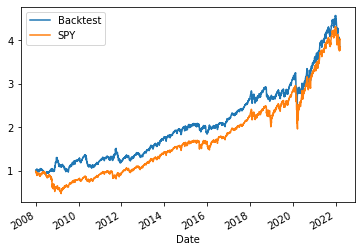

In [13]:
fig,ax = plt.subplots()

rtn.loc['2008':].cumsum().apply(np.exp).plot(ax=ax, label='Backtest')
log_returns['SPY'].loc['2008':].cumsum().apply(np.exp).plot(ax=ax,)
ax.legend()




Hence, this looks like our strategy performs better than SPY.

Project – Backtesting different periods and visualize results

In [14]:
def calculate(log_returns,start,end):
    years = int(end) - int(start) +1

    data = log_returns.loc[start:end]

    cagr = np.exp(data.sum())**(1/years) - 1

    norm = data.cumsum().apply(np.exp)

    rolling_max = norm.rolling(252).max()
    daily_drawdown = norm/rolling_max - 1
    drawdown = daily_drawdown.cummin().iloc[-1]

    volatality = data.std()*(252**.5)

    return cagr,drawdown,volatality


In [15]:
calculate(log_returns['SPY'],'2008','2017')

(0.08445295806273045, -0.5148146856250009, 0.20329910418199426)

In [16]:
calculate(rtn,'2008','2017')

(0.10213248146627452, -0.25300780030129144, 0.14464291650017963)

Now this looks pretty good. A better return 10.2% CAGR, 25.3% maximum drawdown, and 14.5% volatility.

In [20]:
def visualize(backtest, spy, start, end):
    def x_titles(spy_val, bt_val):
        spy_str = str(round(spy_val*100,1))
        bt_str = str(round(bt_val*100,1))
        return ['SPY\n' + spy_str + '%', 'Backtest\n'+ bt_str + '%']

    spy_cagr,spy_drawdown,spy_vol = calculate(spy,start,end)
    bt_cagr, bt_drawdown, bt_vol = calculate(backtest, start, end)

    fig,ax = plt.subplots(2,2)

    spy.loc[start:end].cumsum().apply(np.exp).plot(ax=ax[0 ,0]) 
    backtest.loc[start:end].cumsum().apply(np.exp).plot(ax=ax[0,0], label = 'Backtest', c='c')
    ax[0,0].legend()

    x = x_titles(spy_cagr,bt_cagr)
    ax[0,1].bar(x,[spy_cagr,bt_cagr],color=['b','c'])
    ax[0,1].set_title('CAGR')

    x = x_titles(spy_drawdown,bt_drawdown)
    ax[1,0].bar(x,[spy_drawdown,bt_drawdown],color=['b','c'])
    ax[1,0].set_title('Drawdown')

    x = x_titles(spy_vol,bt_vol)
    ax[1,1].bar(x,[spy_vol,bt_vol],color=['b','c'])
    ax[1,1].set_title('Volatality')

    plt.tight_layout()






 


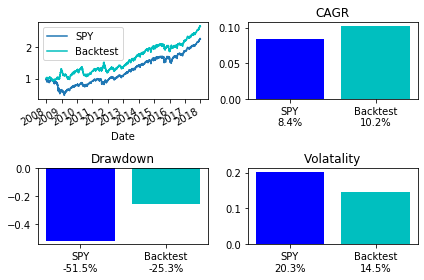

In [21]:
visualize(rtn,log_returns['SPY'],'2008','2017')

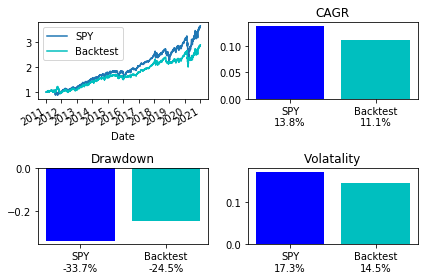

In [22]:
visualize(rtn,log_returns['SPY'],'2011','2020')